# Objetc Classification

## Exploratory Data Analysis


In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm

### Load dataset

In [3]:
columns_name = pd.read_csv('annotations/readme.txt')
columns_name

,The CSV columns are: image_name,x1,y1,x2,y2,class,image_width,image_height


In [4]:
labels = pd.read_csv('annotations/annotations_train.csv', header=None)
labels.head()

,0,1,2,3,4,5,6,7
0,train_0.jpg,208,537,422,814,object,3024,3024
1,train_0.jpg,1268,1923,1365,2209,object,3024,3024
2,train_0.jpg,1135,2074,1261,2166,object,3024,3024
3,train_0.jpg,1045,2085,1122,2258,object,3024,3024
4,train_0.jpg,976,2036,1040,2177,object,3024,3024


In [5]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208482 entries, 0 to 1208481
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1208482 non-null  object
 1   1       1208482 non-null  int64 
 2   2       1208482 non-null  int64 
 3   3       1208482 non-null  int64 
 4   4       1208482 non-null  int64 
 5   5       1208482 non-null  object
 6   6       1208482 non-null  int64 
 7   7       1208482 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 73.8+ MB


In [6]:
labels.describe()

,1,2,3,4,6,7
count,1.208482e+06,1.208482e+06,1.208482e+06,1.208482e+06,1.208482e+06,1.208482e+06
mean,1.174623e+03,1.530047e+03,1.295433e+03,1.720162e+03,2.452477e+03,3.219365e+03
std,7.102995e+02,8.250651e+02,7.128696e+02,8.136492e+02,4.283618e+02,6.758446e+02
min,0.000000e+00,0.000000e+00,2.100000e+01,2.100000e+01,4.800000e+02,6.400000e+02
25%,5.950000e+02,8.960000e+02,7.160000e+02,1.096000e+03,2.336000e+03,2.560000e+03
50%,1.153000e+03,1.496000e+03,1.270000e+03,1.674000e+03,2.448000e+03,3.264000e+03
75%,1.703000e+03,2.105000e+03,1.822000e+03,2.286000e+03,2.448000e+03,3.264000e+03
max,4.129000e+03,4.714000e+03,4.321000e+03,4.905000e+03,4.320000e+03,5.312000e+03


In [7]:
labels.nunique()

0    8219
1    4071
2    4383
3    4145
4    4569
5       1
6      33
7      33
dtype: int64

In [8]:
import os
path = 'images'
for dir,subdir,files in os.walk(path):
    print(dir,' ', str(len(files)))

images   788


In [9]:
files = os.listdir(path)

for element in files:
    print(os.path.join(path, element))

images/train_749.jpg
images/train_4913.jpg
images/train_2231.jpg
images/train_239.jpg
images/val_373.jpg
images/train_4537.jpg
images/train_5629.jpg
images/train_4331.jpg
images/train_1856.jpg
images/train_4656.jpg
images/train_1843.jpg
images/test_1310.jpg
images/test_2631.jpg
images/test_1853.jpg
images/train_5953.jpg
images/test_2220.jpg
images/test_2023.jpg
images/train_4319.jpg
images/train_3111.jpg
images/train_359.jpg
images/train_5210.jpg
images/test_614.jpg
images/test_2143.jpg
images/test_1729.jpg
images/test_2591.jpg
images/train_4293.jpg
images/train_1664.jpg
images/test_2585.jpg
images/train_2812.jpg
images/train_2185.jpg
images/test_2221.jpg
images/test_984.jpg
images/train_2227.jpg
images/train_36.jpg
images/test_1298.jpg
images/test_1890.jpg
images/train_364.jpg
images/train_1472.jpg
images/train_6527.jpg
images/train_4457.jpg
images/train_3264.jpg
images/train_5760.jpg
images/test_205.jpg
images/train_2569.jpg
images/train_6297.jpg
images/train_4871.jpg
images/train_64

images/train_7823.jpg
images/test_985.jpg
images/train_629.jpg
images/train_3311.jpg
images/train_4442.jpg
images/train_1301.jpg
images/train_5364.jpg
images/train_4522.jpg
images/train_3887.jpg
images/train_5417.jpg
images/val_8.jpg
images/train_6692.jpg
images/test_2792.jpg
images/test_2584.jpg
images/test_1259.jpg
images/test_29.jpg
images/train_2580.jpg
images/test_775.jpg
images/train_2596.jpg
images/train_6096.jpg
images/train_6055.jpg
images/test_2020.jpg
images/train_1670.jpg
images/val_574.jpg
images/train_2755.jpg
images/train_6321.jpg
images/train_600.jpg
images/train_8085.jpg
images/test_1107.jpg
images/train_5402.jpg
images/train_2754.jpg
images/train_2543.jpg
images/train_6137.jpg
images/train_3926.jpg
images/train_6269.jpg
images/val_158.jpg
images/train_2146.jpg
images/train_415.jpg
images/train_4130.jpg
images/train_5167.jpg
images/train_5576.jpg
images/train_1300.jpg
images/test_2235.jpg
images/test_827.jpg
images/train_4090.jpg
images/train_6725.jpg
images/train_2595

#### Generator Fuction

In [10]:
def walkdir(path):
    """
    Walk through all the files in a directory and its subfolders.

    Parameters
    ----------
    folder : str
        Path to the folder you want to walk.

    Returns
    -------
        For each file found, yields a tuple having the path to the file
        and the file name.
    """
    for dirpath, _, files in os.walk(path):
        for filename in files:
            yield (dirpath, filename)

In [11]:
walkdir(path)

<generator object walkdir at 0x7f9324494d60>

In [12]:
for dirpath, filename in walkdir(path):
#     print(dirpath)
#     print(filename)
    type_of_img = re.split("_", filename)
    print(type_of_img)

['train', '749.jpg']
['train', '4913.jpg']
['train', '2231.jpg']
['train', '239.jpg']
['val', '373.jpg']
['train', '4537.jpg']
['train', '5629.jpg']
['train', '4331.jpg']
['train', '1856.jpg']
['train', '4656.jpg']
['train', '1843.jpg']
['test', '1310.jpg']
['test', '2631.jpg']
['test', '1853.jpg']
['train', '5953.jpg']
['test', '2220.jpg']
['test', '2023.jpg']
['train', '4319.jpg']
['train', '3111.jpg']
['train', '359.jpg']
['train', '5210.jpg']
['test', '614.jpg']
['test', '2143.jpg']
['test', '1729.jpg']
['test', '2591.jpg']
['train', '4293.jpg']
['train', '1664.jpg']
['test', '2585.jpg']
['train', '2812.jpg']
['train', '2185.jpg']
['test', '2221.jpg']
['test', '984.jpg']
['train', '2227.jpg']
['train', '36.jpg']
['test', '1298.jpg']
['test', '1890.jpg']
['train', '364.jpg']
['train', '1472.jpg']
['train', '6527.jpg']
['train', '4457.jpg']
['train', '3264.jpg']
['train', '5760.jpg']
['test', '205.jpg']
['train', '2569.jpg']
['train', '6297.jpg']
['train', '4871.jpg']
['train', '6491

In [13]:
def listfiles(path):
    """
    get the list of files inlcuded in the dataset
    """
    train_list = []
    test_list = []
    val_list = []
    for dirpath, filename in tqdm(walkdir(path)):
#     for dirpath, filename in walkdir(path):
        # files_to_process = os.path.join(dirpath, filename)
        type_of_img = re.split("_", filename)
        # print(type_of_img[0])
        if type_of_img[0] == "train":
            train_list.append(filename)
        if type_of_img[0] == "test":
            test_list.append(filename)
        if type_of_img[0] == "val":
            val_list.append(filename)
    print(f"The total amount of TRAIN files are {len(train_list)}")
    print(f"The total amount of VALIDATION files are {len(val_list)}")
    print(f"The total amount of TEST files are {len(test_list)}")

    return train_list, test_list, val_list

In [14]:
train_list, test_list, val_list = listfiles(path)


The total amount of TRAIN files are 558
The total amount of VALIDATION files are 38
The total amount of TEST files are 192


## Working with images and OpenCV

In [15]:
# Load an image
img = cv2.imread('images/train_1103.jpg')

print(f'Image type: {type(img)}')
print(f'Image shape: {img.shape} (Height x Width x Channels)')
print(f'Image min value: {img.min()}')
print(f'Image max value: {img.max()}')


Image type: <class 'numpy.ndarray'>
Image shape: (3264, 2448, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


**Important Note:** An image loaded using OpenCV is just a Numpy array, keep in mind you can make use of all the numpy functionalities you know here.

In [16]:
# We can access to pixel values
px = img[100,100] 
print(px)


[223 246 254]


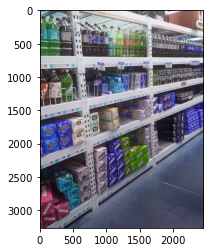

In [17]:
# Display
plt.imshow(img)
plt.show()

**Important Note:** OpenCV uses BGR format while matplotlib uses RGB.

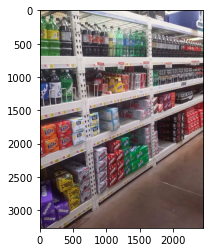

In [18]:
# Convert from RGB to RGB first
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Then display the converted image
plt.imshow(img_rgb)
plt.show()

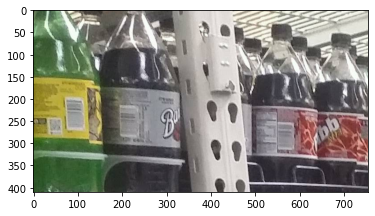

In [19]:
# Crop and extract a certain region from an image
crop = img_rgb[150:560, 135:890]
plt.imshow(crop)
plt.show()

## Load and display some images and their label

In [20]:
# Buscar el nombre del archivo ../images/train_1103.jpg
train_1103 = labels.loc[labels[0]=='train_1103.jpg']

# extraer los BB del .csv
x1 = train_1103.iloc[0][1]
y1 = train_1103.iloc[0][2]
x2 = train_1103.iloc[0][3]
y2 = train_1103.iloc[0][4]
ax1 = train_1103.iloc[1][1]
ay1 = train_1103.iloc[1][2]
ax2 = train_1103.iloc[1][3]
ay2 = train_1103.iloc[1][4]
# dibujarle los BB

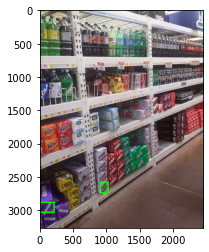

In [21]:
cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0,255,0), 20)
cv2.rectangle(img_rgb, (ax1, ay1), (ax2, ay2), (0,255,0), 20)
plt.imshow(img_rgb)
plt.show()

## Try to iterate over an entire image
### iterrows()


In [22]:
for index, row in train_1103.iterrows():
    print(index, row)

16715 0    train_1103.jpg
1               904
2              2575
3              1016
4              2735
5            object
6              2448
7              3264
Name: 16715, dtype: object
16716 0    train_1103.jpg
1                 0
2              2879
3               211
4              3027
5            object
6              2448
7              3264
Name: 16716, dtype: object
16717 0    train_1103.jpg
1                31
2              3090
3               238
4              3193
5            object
6              2448
7              3264
Name: 16717, dtype: object
16718 0    train_1103.jpg
1              1041
2              2329
3              1139
4              2467
5            object
6              2448
7              3264
Name: 16718, dtype: object
16719 0    train_1103.jpg
1               556
2              2381
3               738
4              2525
5            object
6              2448
7              3264
Name: 16719, dtype: object
16720 0    train_1103.jpg
1        

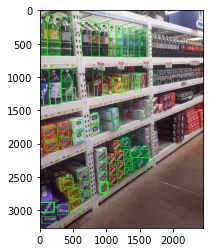

In [23]:

for index, row in train_1103.iterrows():
    x1 = row[1]
    y1 = row[2]
    x2 = row[3]
    y2 = row[4]
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0,255,0), 5)
plt.imshow(img_rgb)
plt.show()

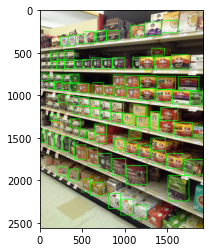

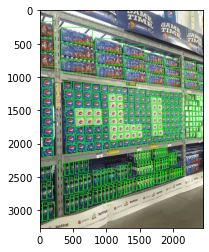

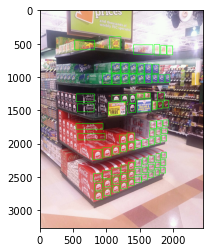

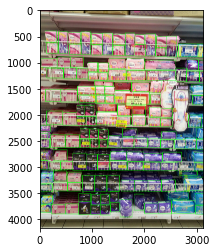

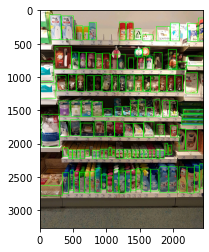

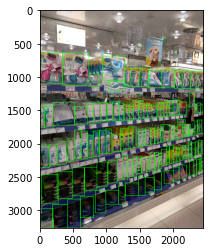

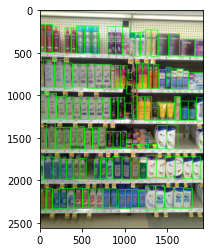

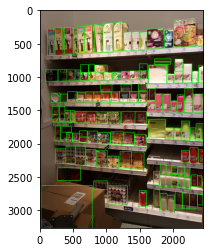

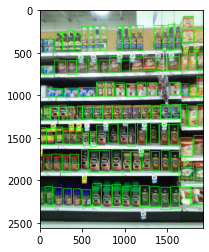

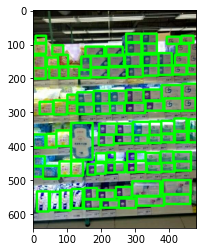

In [29]:
for file in train_list[20:30]:
    path = os.path.join('images', file)
    img = cv2.imread(path)
    # Convert from GRB to RGB first
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Buscar el nombre del archivo ../images/train_1880.jpg
    train_file = labels.loc[labels[0]==file]
    for index, row in train_file.iterrows():
        x1 = row[1]
        y1 = row[2]
        x2 = row[3]
        y2 = row[4]
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0,255,0), 5)
    # Then display the converted image
    plt.imshow(img_rgb)
    plt.show()